# 导入需要的包

In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch as t
import torch.optim as optim

In [2]:
import numpy as np

# 定义网路

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        

In [4]:
net = Net()

In [5]:
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [6]:
for name,para in net.named_parameters():
    print(name,':',para.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


# 测试数据

In [32]:
input = t.randn(3, 1, 32, 32)
out = net(input)
out.size()

torch.Size([3, 10])

In [33]:
out

tensor([[-0.2316, -8.3453, -3.6949, -6.8085,  6.9678, 16.3747, -0.4129, -6.0530,
          2.4898,  2.4800],
        [ 3.7099,  0.7855, -0.5790, -4.8993,  2.5702,  7.8640, -3.7059, -3.9834,
         -1.0880,  3.5866],
        [-1.8652, -4.4865,  0.9362, -9.1556, 10.8245, 14.4697, -6.1978, -5.8015,
          5.9397,  2.7098]], grad_fn=<AddmmBackward>)

In [10]:
target = t.zeros(1,10).view(1,10).long()
target[0][3] = 1

In [34]:
target = t.tensor([1,3,5])

In [35]:
target.size()

torch.Size([3])

## 损失函数

In [36]:
criterion = nn.CrossEntropyLoss()

In [37]:
loss = criterion(out,target)
loss

tensor(12.5148, grad_fn=<NllLossBackward>)

## 反向传播

In [14]:
net.zero_grad()
print('反向传播之前 conv1.bias的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后 conv1.bias的梯度')
print(net.conv1.bias.grad)

反向传播之前 conv1.bias的梯度
None
反向传播之后 conv1.bias的梯度
tensor([-0.0187, -0.0280,  0.0068, -0.0110,  0.0314,  0.0360])


## 优化器

In [15]:
optimizer = optim.SGD(net.parameters(),lr=0.01)

# 清空梯度
optimizer.zero_grad()

# 计算损失
output = net(input)
loss = criterion(output,target)

# 反向传播
loss.backward()

# 更新参数
optimizer.step()

In [16]:
x = t.randn(200,1,32,32)

In [25]:
x[0:1,:,:, :].shape

torch.Size([1, 1, 32, 32])

In [39]:
np_data = np.random.randint(10,size=200)

In [40]:
target = t.from_numpy(np_data).long()

In [41]:
target[0:5].unsqueeze(0).shape

torch.Size([1, 5])

In [42]:
target[0].unsqueeze(0).shape

torch.Size([1])

In [43]:
for epoch in range(30):
    all_loss = 0
    for i in range(39):
        input_data = x[5*i:5*i+5,:,:, :]
        out = net(input_data)
        target_data = target[5*i:5*i+5]

        optimizer.zero_grad()
        loss = criterion(out, target_data)
        loss.backward()
        
        all_loss += loss.item()

        optimizer.step()
    print('every epoch loss:',all_loss/200)
    

every epoch loss: 0.6946102714538575
every epoch loss: 0.4332793790102005
every epoch loss: 0.41326736271381376
every epoch loss: 0.3955635350942612
every epoch loss: 0.3773640024662018
every epoch loss: 0.35939031064510346
every epoch loss: 0.3398326313495636
every epoch loss: 0.3199641168117523
every epoch loss: 0.29801361858844755
every epoch loss: 0.2756429839134216
every epoch loss: 0.25373943269252774
every epoch loss: 0.23134663015604018
every epoch loss: 0.20959792792797088
every epoch loss: 0.18867456436157226
every epoch loss: 0.1660308501124382
every epoch loss: 0.14533435121178628
every epoch loss: 0.12671553440392017
every epoch loss: 0.10856434039771556
every epoch loss: 0.09259809304028749
every epoch loss: 0.07765115404501557
every epoch loss: 0.06484807036817074
every epoch loss: 0.05423285902477801
every epoch loss: 0.04354769885540009
every epoch loss: 0.03512225683778524
every epoch loss: 0.027613970758393405
every epoch loss: 0.021727481544949113
every epoch loss: 

# 训练一个十分类网络

## 下载数据集

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [44]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

In [45]:
# 第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 大约100M，需花费一定的时间，
# 如果已经下载有CIFAR-10，可通过root参数指定

# 定义对数据的预处理
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
                             ])

# 训练集
trainset = tv.datasets.CIFAR10(
                    root='./cha2_data/', 
                    train=True, 
                    download=True,
                    transform=transform)

trainloader = t.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)

# 测试集
testset = tv.datasets.CIFAR10(
                    './cha2_data/',
                    train=False, 
                    download=True, 
                    transform=transform)

testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

100%|██████████████████████████████████████████████████████████████▊| 169861120/170498071 [00:32<00:00, 6919348.00it/s]

Extracting ./cha2_data/cifar-10-python.tar.gz to ./cha2_data/
Files already downloaded and verified


170500096it [00:50, 6919348.00it/s]                                                                                    

In [61]:
len(trainset)

50000

In [63]:
len(trainset[0])

2

In [66]:
trainset[0][0].shape

torch.Size([3, 32, 32])

In [67]:
trainset[0][1]

6

ship


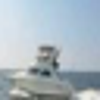

In [46]:
(data, label) = trainset[100]
print(classes[label])

# (data + 1) / 2是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

      truck         cat       plane        deer


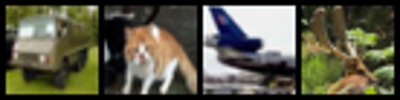

In [53]:
dataiter = iter(trainloader)
images, labels = dataiter.next() # 返回4张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

## 定义网络

In [56]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet,self).__init__()
        
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120) #这里的5*5是原图32*32经过两轮5*5卷积以及2*2池化后的结果
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [69]:
mynet = MyNet()

In [70]:
print(mynet)

MyNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## 定义损失函数和优化器

In [71]:
criterion = nn.CrossEntropyLoss()
opitimizer = optim.SGD(mynet.parameters(),lr=0.001,momentum=0.9)

# 训练模型

In [72]:
t.set_num_threads(8)
for epoch in range(10):
    running_loss = 0
    for i,data in enumerate(trainloader,0):
        '''
        enumerate()用于可迭代\可遍历的数据对象组合为一个索引序列，同时列出数据和数据下标.上面代码的0表示从索引从0开始，假如为1的话，那索引就从1开始。
        '''
        inputs, label  = data
        
        # 梯度清零
        opitimizer.zero_grad()
        
        # forward + backward
        outputs = mynet(inputs)
        loss = criterion(outputs, label)
        loss.backward()
        
        # 更新参数
        opitimizer.step()
        
        #打印log信息
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d ] loss: %.3f' %(epoch+1, i+1, running_loss/2000) )
            running_loss = 0
print('Finish trainning')

[1,  2000 ] loss: 2.180
[1,  4000 ] loss: 1.866
[1,  6000 ] loss: 1.676
[1,  8000 ] loss: 1.591
[1, 10000 ] loss: 1.525
[1, 12000 ] loss: 1.483
[2,  2000 ] loss: 1.415
[2,  4000 ] loss: 1.392
[2,  6000 ] loss: 1.353
[2,  8000 ] loss: 1.351
[2, 10000 ] loss: 1.313
[2, 12000 ] loss: 1.288
[3,  2000 ] loss: 1.244
[3,  4000 ] loss: 1.223
[3,  6000 ] loss: 1.223
[3,  8000 ] loss: 1.195
[3, 10000 ] loss: 1.195
[3, 12000 ] loss: 1.194
[4,  2000 ] loss: 1.125
[4,  4000 ] loss: 1.120
[4,  6000 ] loss: 1.133
[4,  8000 ] loss: 1.126
[4, 10000 ] loss: 1.135
[4, 12000 ] loss: 1.131
[5,  2000 ] loss: 1.056
[5,  4000 ] loss: 1.043
[5,  6000 ] loss: 1.053
[5,  8000 ] loss: 1.053
[5, 10000 ] loss: 1.077
[5, 12000 ] loss: 1.055
[6,  2000 ] loss: 0.960
[6,  4000 ] loss: 1.000
[6,  6000 ] loss: 0.989
[6,  8000 ] loss: 1.016
[6, 10000 ] loss: 0.992
[6, 12000 ] loss: 1.008
[7,  2000 ] loss: 0.922
[7,  4000 ] loss: 0.919
[7,  6000 ] loss: 0.957
[7,  8000 ] loss: 0.948
[7, 10000 ] loss: 0.968
[7, 12000 ] loss

## 验证模型

实际的label:
       cat     ship     ship    plane


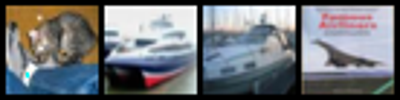

In [73]:
dataiter = iter(testloader)
images, labels = dataiter.next() # 一个batch返回4张图片
print('实际的label:\n ', ' '.join(\
            '%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400,100))

In [75]:
images.shape

torch.Size([4, 3, 32, 32])

In [76]:
# 计算图片在每个类别上的分数
outputs = mynet(images)
# 得分最高的那个类
_, predicted = t.max(outputs.data, 1) #返回预测结果

print('预测结果: ', ' '.join('%5s'\
            % classes[predicted[j]] for j in range(4)))

预测结果:    cat  ship truck plane


In [79]:
outputs.data.shape

torch.Size([4, 10])

In [81]:
predicted

tensor([3, 8, 9, 0])

## 预测整个测试集的准确率

In [82]:
correct = 0
total = 0

with t.no_grad():
    for data in testloader:
        images ,labels = data
        outputs = mynet(images)
        _, predicted = t.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
print('10000张测试集中的准确率为: %d %%' %(100 * correct / total))

10000张测试集中的准确率为: 62 %
